In [87]:
#Importando librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression #Para imputación por regresión.
from sklearn import tree #Para imputación por DecisionTree.
from sklearn.preprocessing import LabelEncoder #Para codificador de etiquetas.
from collections import defaultdict #Para un valor de diccionario por defecto.
from sklearn.impute import SimpleImputer #Para llevar a cabo imputaciones univariadas

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Establecer la ruta de trabajo 
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
FileCSV="MarketingDirecto.csv"
mark=pd.read_csv(FileCSV,  #ruta del archivo
                 sep=',') #separador de atributo que usa el fichero csv
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [4]:
mark.isnull().any().any() # A NIVEL DE TODO EL DATAFRAME

True

In [5]:
mark.isnull().any() #ACA EVALUA CADA VARIABLE

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial     True
Catalogos    False
Monto        False
dtype: bool

In [6]:
mark.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto          0
dtype: int64

In [7]:
mark.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto          0
dtype: int64

In [8]:
mark.isnull().sum()/len(mark)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [9]:
#Creando una nueva columna que identifique en que filas existe un NA
mark["ValorNulo"]=mark["Historial"].isnull()
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False


In [10]:
mark2=mark.loc[mark.ValorNulo==False]
mark2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto,ValorNulo
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755,False
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318,False
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296,False
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436,False
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304,False


In [11]:
print(mark.shape)
print(mark2.shape)

(1000, 11)
(697, 11)


In [12]:
mark.dtypes

Edad         object
Genero       object
Vivienda     object
Ecivil       object
Ubicacion    object
Salario       int64
Hijos         int64
Historial    object
Catalogos     int64
Monto         int64
ValorNulo      bool
dtype: object

In [13]:
FileCSV="MarketingDirecto.csv"
mark=pd.read_csv(FileCSV,  #ruta del archivo
                 sep=',') #separador de atributo que usa el fichero csv
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [14]:
mark.dtypes

Edad         object
Genero       object
Vivienda     object
Ecivil       object
Ubicacion    object
Salario       int64
Hijos         int64
Historial    object
Catalogos     int64
Monto         int64
dtype: object

In [15]:
#Calcular el numero de variables por tipo
mark.columns.to_series().groupby(mark.dtypes).size()

int64     4
object    6
dtype: int64

In [16]:
#Agrupando las variables por tipo
tipos=mark.columns.to_series().groupby(mark.dtypes).groups
tipos

{dtype('int64'): Index(['Salario', 'Hijos', 'Catalogos', 'Monto'], dtype='object'),
 dtype('O'): Index(['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial'], dtype='object')}

In [17]:
#Armando una lista de columnas categoricas
colcat=tipos[np.dtype('object')]
colcat

Index(['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial'], dtype='object')

In [18]:
colcat=tipos[np.dtype('object')].to_list()
colcat

['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']

In [19]:
colnum=tipos[np.dtype('int64')].to_list()
colnum

['Salario', 'Hijos', 'Catalogos', 'Monto']

In [20]:
#Completando los valores faltantes para variable categorica
for cat in colcat:
    moda=mark[cat].mode()[0]
    mark[cat]=mark[cat].fillna(moda)

In [21]:
mark.isnull().any()

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial    False
Catalogos    False
Monto        False
dtype: bool

In [22]:
#Nueva verificacion de los NA's a nivel de variables
mark.isnull().mean()*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

__Interactuando con una variable cualitativa__

In [23]:
civil_freq=pd.value_counts(mark.Ecivil)
civil_freq

Casado     502
Soltero    498
Name: Ecivil, dtype: int64

In [24]:
civil_freq2=mark.groupby("Ecivil").size()
civil_freq2

Ecivil
Casado     502
Soltero    498
dtype: int64

In [25]:
#Ejemplificar la primera categoria 
print(civil_freq[0])
str(round((civil_freq[0]/civil_freq.sum())*100,1))+'%'

502


'50.2%'

In [26]:
labels=[str(round((x/civil_freq.sum())*100,1))+'%' for x in civil_freq]
labels

['50.2%', '49.8%']

In [27]:
labels[0]="Casado: "+labels[0]
labels[1]="Soltero: "+labels[1]
labels

['Casado: 50.2%', 'Soltero: 49.8%']

**_Grafico de Pie(sectores)_**

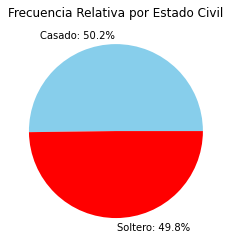

In [28]:
plt.pie(civil_freq,labels=labels,colors=['skyblue','red'])
plt.title('Frecuencia Relativa por Estado Civil')
plt.show()

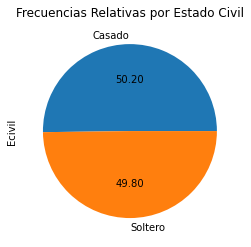

In [29]:
#Metodo Alternativo 
civil_freq.plot(kind='pie',autopct='%.2f',title='Frecuencias Relativas por Estado Civil')

**_Graficos de Barra_**

In [30]:
#Categorizando la variable salario
#Binds no toma los extremos
mark['salario_cat']=pd.cut(mark.Salario,bins=[mark.Salario.min()-1,30000,100000,mark.Salario.max()+1])
pd.value_counts(mark.salario_cat)

(30000, 100000]     653
(10099, 30000]      250
(100000, 168801]     97
Name: salario_cat, dtype: int64

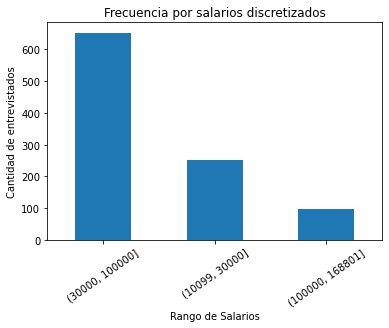

In [31]:
#Creando el grafico de Barras 
plot=pd.value_counts(mark.salario_cat).plot(kind='bar',title='Frecuencia por salarios discretizados',rot=35)
plot.set_ylabel('Cantidad de entrevistados')
plot.set_xlabel('Rango de Salarios')
plt.show()

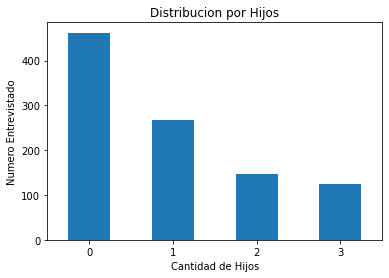

In [32]:
#Grafico de Barras para el numero de hijos
mark.groupby('Hijos').size().plot(kind='bar',rot=0)
plt.title('Distribucion por Hijos')
plt.xlabel('Cantidad de Hijos')
plt.ylabel('Numero Entrevistado')
plt.show()

**_Graficos de BoxPlot_**

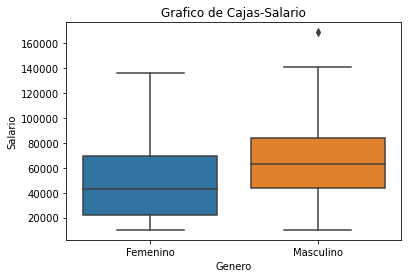

In [33]:
sns.boxplot(x=mark.Genero, # La variable categorizadora o separadora
            y=mark.Salario) #La variable cuantitativa de rpta
plt.title('Grafico de Cajas-Salario')
plt.show()

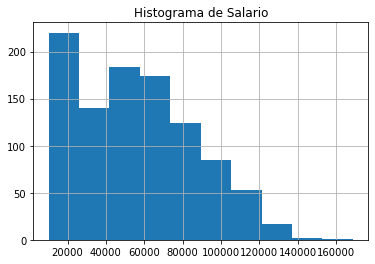

In [34]:
mark.Salario.hist()
plt.title('Histograma de Salario')
plt.show()

**_Grafico de Dispersion_**

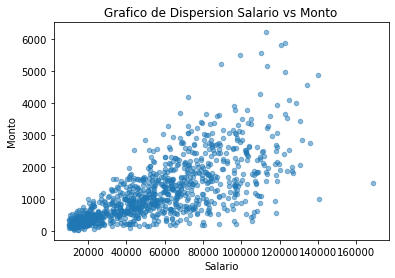

In [35]:
mark.plot.scatter(x='Salario',y='Monto',alpha=0.5)
plt.title('Grafico de Dispersion Salario vs Monto')
plt.show()

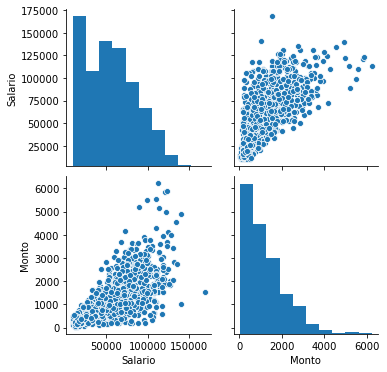

In [36]:
#Grafico de Dispersion entre pares
# Scatter plot:
#sns.set()
cols = ['Salario', 'Monto']
sns.pairplot(mark[cols], #data y sus columnas seleccionadas
             height = 2.5) #tamaño de la gráfica
plt.show();

In [37]:
FileCSV='bank.csv'
df_bank=pd.read_csv(FileCSV, sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**_Codificando Variables_**

# Entendiendo el LabelEncoder

In [38]:
from collections import defaultdict
from sklearn import preprocessing 

In [39]:
#Instanciando el objeto Encoder
encoder=LabelEncoder()
#Aprender de las categorias listadas(valores)
encoder.fit(['Soltero','Soltero','Casado','Viudo','Divorciado','Divorciado'])
print(encoder.classes_)
#De lo aprendido, transformar los codigos
encoder.transform(['Soltero','Viudo','Viudo','Divorciado','Casado'])

['Casado' 'Divorciado' 'Soltero' 'Viudo']


array([2, 3, 3, 1, 0])

In [40]:
encoder.inverse_transform([2,1,1,0,3])

array(['Soltero', 'Divorciado', 'Divorciado', 'Casado', 'Viudo'],
      dtype='<U10')

# Entendiendo el DefaultDict

In [41]:
versiones_lenguajes=defaultdict(lambda: '1.0.0')
versiones_lenguajes['Java']='12.0.0'
versiones_lenguajes['PHP']='7.1.2'
versiones_lenguajes['C#']='7.0.0'

In [42]:
print(versiones_lenguajes)

defaultdict(<function <lambda> at 0x000001D816A5D670>, {'Java': '12.0.0', 'PHP': '7.1.2', 'C#': '7.0.0'})


In [43]:
versiones_lenguajes['Python']
print(versiones_lenguajes)

defaultdict(<function <lambda> at 0x000001D816A5D670>, {'Java': '12.0.0', 'PHP': '7.1.2', 'C#': '7.0.0', 'Python': '1.0.0'})


In [44]:
#Forma Clasica
def sumatoria(x,y):
    return x+y

#Lambda es una funcion Anónima#
suma=lambda x,y:x+y

In [45]:
d=defaultdict(LabelEncoder)
print(type(d))

<class 'collections.defaultdict'>


In [46]:
print(d['job'])
print(d['marital'])

LabelEncoder()
LabelEncoder()


In [47]:
#Agrupando las variables por tipo
tipos=df_bank.columns.to_series().groupby(df_bank.dtypes).groups
tipos

{dtype('int64'): Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object')}

In [48]:
list_text=list(tipos[np.dtype('object')])
list_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [49]:
#Estableciendo una instancia de defaultdict
d=defaultdict(LabelEncoder)

In [50]:
#fit realiza un aprendizado de las categorias ajustando los datos encontrados
#aplly es para aplicar a cada una de las variables
fit=df_bank.apply(lambda x:d[x.name].fit(x) if x.name in list_text else x) 

#Transform ejecuta lo aprendiedo con el fit
df_bank2=df_bank.apply(lambda x:d[x.name].transform(x) if x.name in list_text else x) 
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


__Particionamiento de Datos__

In [59]:
x=df_bank2.iloc[:,0:len(df_bank2.columns)-1].values
y=df_bank2.iloc[:,len(df_bank2.columns)-1].values
xtrain,xtest,ytrain,ytest=train_test_split(x,#Matriz de Datos
                                          y, #Variable Target
                                          test_size=0.3,# Proporcion del testing Dataset
                                          random_state=2020,#Semilla
                                          stratify=y) #Criterio de Estratificacion

NameError: name 'train_test_split' is not defined

In [ ]:
len(df_bank2.index)

In [ ]:
type(xtrain)

In [ ]:
print(len(xtrain))
print(len(xtest))

# Eliminando muestras o caracteristicas con valores faltantes

In [ ]:
import pandas as pd
from io import StringIO
import sys

In [ ]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

In [ ]:
# Eliminando variables que contengan al menos un NA
#axis=0--elimina filas con NA , axis=1--elimina columnas con NA
df.dropna(axis=1)

In [ ]:
# (how = "all") solo elimina filas donde todas las columnas son NaN
df.dropna(how='all')

In [ ]:
# (how = "all") solo elimina filas donde al menos una columna tiene valor NaN
df.dropna(how='any')

In [ ]:
# (thresh=k) quedarse con las filas que tengan al menos k valores no NaN
df.dropna(thresh=4)

In [ ]:
#Eiminar filas donde existan NaN en una columna o variable en particular
df.dropna(subset=['D'])

__Imputacion univariada para Missing Values__

In [ ]:
FileCSV="censusn.csv"
censusn=pd.read_csv(FileCSV,  sep=';')
censusn.head()

In [ ]:
#Eliminando la variable Unammed:0 
censusn.drop('Unnamed: 0', axis=1, inplace=True)
censusn.head()

In [ ]:
pd.value_counts(censusn.V2)

In [ ]:
# Almacenar los nombres de las variables en un objeto de tipo lista
columnas=list(censusn.columns)

In [ ]:
#Porcentaje de Nan por variable
censusn.isnull().sum()*100/len(censusn)

In [ ]:
#Instanciamos un objeto de clase SimpleImputer
imp_mediana=SimpleImputer(strategy='median')

In [ ]:
#Se aplicara a todo el df
censusn_imputado=imp_mediana.fit_transform(censusn)
censusn_imputado=pd.DataFrame(censusn_imputado,columns=columnas)

In [ ]:
censusn_imputado.head()

In [ ]:
censusn_imputado.isnull().sum()*100/len(censusn_imputado)

In [54]:
fileCSV='MarketingDirecto_2.csv'
df_marketing=pd.read_csv(fileCSV,sep=';')
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       1000 non-null   object 
 1   Genero     1000 non-null   object 
 2   Vivienda   1000 non-null   object 
 3   Ecivil     1000 non-null   object 
 4   Ubicacion  1000 non-null   object 
 5   Salario    1000 non-null   int64  
 6   Hijos      1000 non-null   int64  
 7   Historial  697 non-null    object 
 8   Catalogos  1000 non-null   int64  
 9   Monto      987 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [55]:
df_marketing.isnull().sum()*100/len(df_marketing)

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         1.3
dtype: float64

**_Imputacion por regresion_**

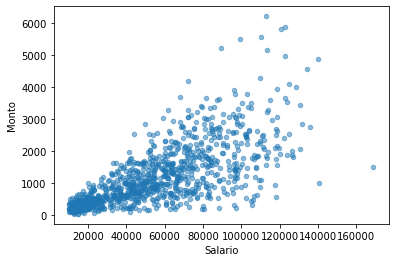

In [70]:
df_marketing.plot.scatter(x="Salario",
                         y="Monto",
                         alpha=0.5)
plt.show()

In [71]:
#True si el registro presenta un NA en la variable Monto
nulos=pd.isna(df_marketing.loc[:,"Monto"])
nulos

0      False
1      False
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Monto, Length: 1000, dtype: bool

In [72]:
df_marketing_nulos=df_marketing.loc[nulos]
df_marketing_completos=df_marketing.loc[~nulos]
df_marketing_completos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       987 non-null    object 
 1   Genero     987 non-null    object 
 2   Vivienda   987 non-null    object 
 3   Ecivil     987 non-null    object 
 4   Ubicacion  987 non-null    object 
 5   Salario    987 non-null    int64  
 6   Hijos      987 non-null    int64  
 7   Historial  689 non-null    object 
 8   Catalogos  987 non-null    int64  
 9   Monto      987 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 84.8+ KB


In [73]:
xtrain=df_marketing_completos[["Salario"]]
ytrain=df_marketing_completos[["Monto"]]

xtest=df_marketing_nulos[["Salario"]]

In [74]:
regre=LinearRegression()
type(regre)


sklearn.linear_model._base.LinearRegression

In [75]:
#Aprendo del subconjunto de datos completos
regre.fit(xtrain,ytrain)

LinearRegression()

In [76]:
#Con lo que aprendi ahora obtengo los faltantes
ypredicho=regre.predict(xtest)
ypredicho=np.round(ypredicho,1)
ypredicho

array([[1490.7],
       [1814.5],
       [ 404.8],
       [1166.9],
       [2268.2],
       [1166.9],
       [2365.1],
       [2347.5],
       [1735.2],
       [ 378.4],
       [ 924.6],
       [1008.3],
       [ 257.2]])

In [77]:
df_marketing_nulos.index

Int64Index([4, 15, 132, 137, 142, 148, 796, 797, 798, 803, 804, 827, 828], dtype='int64')

In [78]:
df_marketing.loc[df_marketing_nulos.index,"Monto"]=ypredicho
df_marketing.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1490.7


In [79]:
#Verificando Porcentaje NAs por columna
df_marketing.isnull().sum()*100/len(df_marketing)

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

**_Imputacion por Arboles de Decision_**

In [80]:
perdidos=pd.isna(df_marketing.loc[:,"Historial"])

In [81]:
df_marketing_nulos2=df_marketing.loc[perdidos]
df_marketing_completos2=df_marketing.loc[~perdidos]



In [82]:
xtrain2=df_marketing_completos2[["Edad","Genero","Ecivil"]]
ytrain2=df_marketing_completos2[["Historial"]]

xtest2=df_marketing_nulos2[["Edad","Genero","Ecivil"]]

In [83]:
df_marketing.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1490.7


**_Codificar las variables predictoras_**

In [84]:
#Generamos un diccionario con valor por defecto LabelEncoder
d=defaultdict(LabelEncoder)

In [85]:
#Aprendemos de las categorias de cada variable
fit=xtrain2.apply(lambda x: d[x.name].fit(x))

In [86]:
#Transformar o codificar las variables predictoras para aplicar mi tecnica de arboles
xtrain2_cod=xtrain2.apply(lambda x: d[x.name].transform(x))
xtrain2_cod.head()

,Edad,Genero,Ecivil
0,0,0,1
1,2,1,1
2,1,0,1
3,2,1,0
4,2,0,1


In [88]:
#Creamos una instancia de la clase DecisionTreeClassifier
arboles=tree.DecisionTreeClassifier(criterion="entropy",
                                   min_samples_split=20,
                                   min_samples_leaf=5,
                                   max_depth=4)
type(arboles)

sklearn.tree._classes.DecisionTreeClassifier

In [89]:
#Aprendo del subconjunto de datos completos 
arboles.fit(xtrain2_cod,ytrain2)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=20)

In [91]:
xtest2_cod=xtest2.apply(lambda x: d[x.name].fit_transform(x))

In [92]:
#Prediciendo o Imputando
ypredicho2=arboles.predict(xtest2_cod)

In [93]:
#Incorporar los valores imputados al dataframe original
df_marketing.loc[df_marketing_nulos2.index,"Historial"]=ypredicho2

In [94]:
#Verificacion de nulos
df_marketing.isnull().any()

Edad         False
Genero       False
Vivienda     False
Ecivil       False
Ubicacion    False
Salario      False
Hijos        False
Historial    False
Catalogos    False
Monto        False
dtype: bool